# RANDOM FOREST REGRESSOR ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Litecoin.csv')

df.head()

SNo      Name Symbol                 Date     High      Low     Open  \
0    1  Litecoin    LTC  2013-04-29 23:59:59  4.57360  4.22564  4.36676   
1    2  Litecoin    LTC  2013-04-30 23:59:59  4.57238  4.16896  4.40352   
2    3  Litecoin    LTC  2013-05-01 23:59:59  4.35686  3.52029  4.28954   
3    4  Litecoin    LTC  2013-05-02 23:59:59  4.03930  3.00717  3.78002   
4    5  Litecoin    LTC  2013-05-03 23:59:59  3.45361  2.39594  3.39044   

     Close  Volume     Marketcap  
0  4.38390     0.0  7.538896e+07  
1  4.29649     0.0  7.402092e+07  
2  3.80101     0.0  6.560460e+07  
3  3.37198     0.0  5.828798e+07  
4  3.04491     0.0  5.269485e+07

In [3]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [4]:
del df['SNo']
del df['Name']
del df['Symbol']
del df['Date']
del df['Marketcap']

In [5]:
df=df.dropna()

In [6]:
df.head()

High      Low     Open    Close  Volume
0  4.57360  4.22564  4.36676  4.38390     0.0
1  4.57238  4.16896  4.40352  4.29649     0.0
2  4.35686  3.52029  4.28954  3.80101     0.0
3  4.03930  3.00717  3.78002  3.37198     0.0
4  3.45361  2.39594  3.39044  3.04491     0.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    2991 non-null   float64
 1   Low     2991 non-null   float64
 2   Open    2991 non-null   float64
 3   Close   2991 non-null   float64
 4   Volume  2991 non-null   float64
dtypes: float64(5)
memory usage: 117.0 KB


In [8]:
x = df.drop(labels='Close', axis=1)
y = df.loc[:,'Close']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  2392
NUMBER OF TEST DATASET      :  599
TOTAL NUMBER OF DATASET    :  2991


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2392
NUMBER OF TEST DATASET      :  599
TOTAL NUMBER OF DATASET    :  2991


In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [13]:
predicted = RFR.predict(x_test)

In [14]:
from sklearn.metrics import rand_score
RS = rand_score(y_test, predicted)
print("MEAN RAND SCOORE OF RANDOM FOREST REGRESSOR",RS*100)

MEAN RAND SCOORE OF RANDOM FOREST REGRESSOR 100.0


In [15]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predicted)
print("MEAN R2 SCOORE OF RANDOM FOREST REGRESSOR",R2*100)

MEAN R2 SCOORE OF RANDOM FOREST REGRESSOR 99.78355898876822


In [16]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predicted)
print("MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR",MSE)

MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR 9.297768791613871


In [17]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, predicted, squared=False)
print(" ROOT MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR",RMSE)

 ROOT MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR 3.0492242934251115


In [18]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predicted)
print("MEAN ABSOLUTE ERROR OF RANDOM FOREST REGRESSOR",MAE)

MEAN ABSOLUTE ERROR OF RANDOM FOREST REGRESSOR 1.2973769655057545


In [19]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, predicted)
print("EXPLAINED VARIANCE SCORE OF RANDOM FOREST REGRESSOR",EVS)

EXPLAINED VARIANCE SCORE OF RANDOM FOREST REGRESSOR 0.9978379048169649


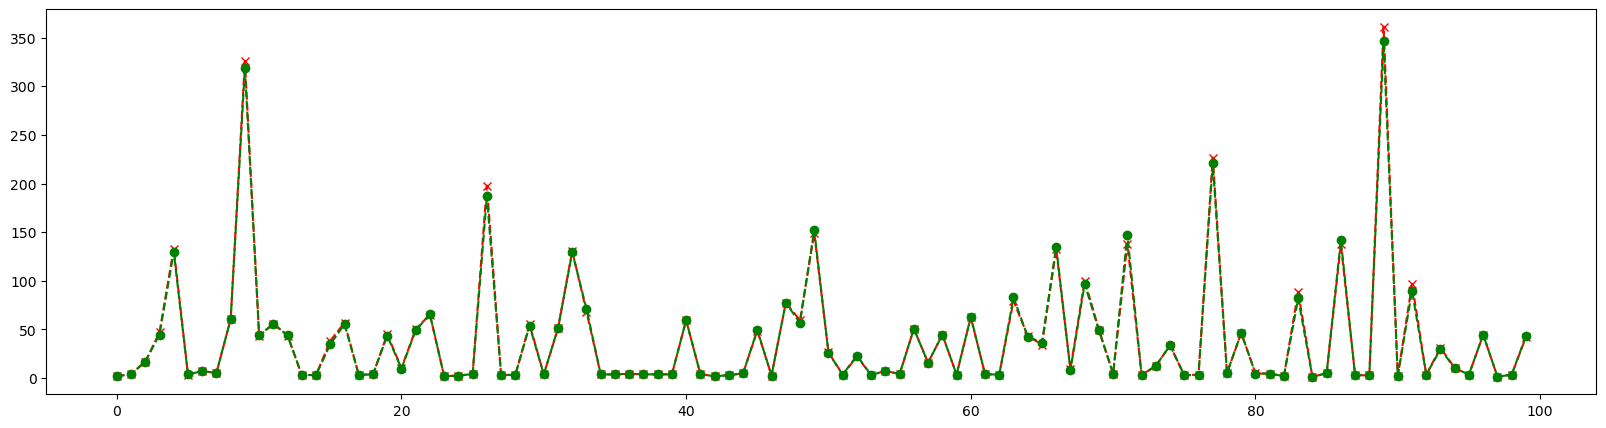

In [20]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [21]:
import joblib
joblib.dump(RFR, 'LITECOIN2.pkl')

['LITECOIN2.pkl']

In [22]:
# import ydata_profiling as yp
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from ydata_profiling.model import describe
# prof = ProfileReport(data)
# prof.to_file(output_file='bitcoin.html')